# Tugas Prapraktikum

Tugas Prapraktikum dikerjakan dengan _dataset_ [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/download?datasetVersionNumber=2). Tanpa meninjau waktu (`date`), prediksi status hujan pada keesokan harinya (`RainTomorrow`). Berikan nilai `1` jika diprediksi hujan pada keesokan harinya, `0` jika tidak.

<br>
Tugas dikerjakan secara berkelompok. Setiap kelompok terdiri atas 2 (dua) mahasiswa. Kumpulkan paling lambat pada Minggu, 16 April 2023, pukul 23:59 WIB melalui Edunex.

# 0. Persiapan Data and Pustaka

## Install and import dependencies

In [1]:
!pip install imblearn
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 10.8 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.ensemble import VotingClassifier, StackingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

## Read the data

In [3]:
df = pd.read_csv('weatherAUS.csv')
df = df.drop(['Date'], axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# I. Pemahaman Data
Tujuan dari bagian ini adalah peserta dapat memahami kualitas dari data yang diberikan. Hal yang diliputi adalah sebagai berikut:
1. Ukuran data
2. Statistik dari tiap fitur
3. Pencilan (_outlier_)
4. Korelasi
5. Distribusi 

## I.1 
Carilah:
1. Ukuran dari data (instansi dan fitur)
2. Tipe dari setiap fitur 
3. Banyak nilai unik dari fitur yang bertipe kategorikal
4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal

In [4]:
# I.1 Kode di sini.

# 1. Ukuran dari data (instansi dan fitur)
df.shape

(145460, 22)

In [5]:
# 2. Tipe dari setiap fitur
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
# 3. Banyak nilai unik dari fitur yang bertipe kategorikal
df.select_dtypes(include=['object']).nunique()

Location        49
WindGustDir     16
WindDir9am      16
WindDir3pm      16
RainToday        2
RainTomorrow     2
dtype: int64

In [7]:
# 4. Nilai minimum, maksimum, rata-rata, median, dan standar deviasi dari fitur nonkategorikal
df.select_dtypes(include=['float64']).describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## I.2
Carilah:
1. Nilai hilang (_missing_) dari setiap fitur
2. Nilai pencilan (_outlier_) dari setiap fitur

In [8]:
# I.2 Kode di sini.

# 1. Nilai hilang (missing) dari setiap fitur
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
# 2. Nilai pencilan (outlier) dari setiap fitur

q1 = df.select_dtypes(include=['float64']).quantile(0.25)
q3 = df.select_dtypes(include=['float64']).quantile(0.75)
iqr = q3 - q1

minimum_range = q1 - 1.5 * iqr
maximum_range = q3 + 1.5 * iqr

# Nilai outlier cuman bisa di type number
((df.select_dtypes(include=['float64']) < minimum_range) | (df.select_dtypes(include=['float64']) > maximum_range)).sum()

MinTemp             54
MaxTemp            489
Rainfall         25578
Evaporation       1995
Sunshine             0
WindGustSpeed     3092
WindSpeed9am      1817
WindSpeed3pm      2523
Humidity9am       1425
Humidity3pm          0
Pressure9am       1191
Pressure3pm        919
Cloud9am             0
Cloud3pm             0
Temp9am            262
Temp3pm            764
dtype: int64

## I.3
Lakukan:
1. Pencarian korelasi antarfitur
2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)
3. Visualisasi distribusi setiap fitur per target (`RainTomorrow`)

In [10]:
# I.3 Kode di sini.

# 1. Pencarian korelasi antar fitur
df.select_dtypes(include=['float64']).corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.736555,0.103938,0.466993,0.072586,0.177415,0.175064,0.175173,-0.232899,0.006089,-0.450970,-0.461292,0.078754,0.021605,0.901821,0.708906
MaxTemp,0.736555,1.000000,-0.074992,0.587932,0.470156,0.067615,0.014450,0.050300,-0.504110,-0.508855,-0.332061,-0.427167,-0.289370,-0.277921,0.887210,0.984503
Rainfall,0.103938,-0.074992,1.000000,-0.064351,-0.227549,0.133659,0.087338,0.057887,0.224405,0.255755,-0.168154,-0.126534,0.198528,0.172403,0.011192,-0.079657
Evaporation,0.466993,0.587932,-0.064351,1.000000,0.365602,0.203021,0.193084,0.129400,-0.504092,-0.390243,-0.270362,-0.293581,-0.183793,-0.182618,0.545115,0.572893
Sunshine,0.072586,0.470156,-0.227549,0.365602,1.000000,-0.034750,0.005499,0.053834,-0.490819,-0.629130,0.041970,-0.019719,-0.675323,-0.703930,0.291188,0.490501
WindGustSpeed,0.177415,0.067615,0.133659,0.203021,-0.034750,1.000000,0.605303,0.686307,-0.215070,-0.026327,-0.458744,-0.413749,0.071736,0.109168,0.150150,0.032748
WindSpeed9am,0.175064,0.014450,0.087338,0.193084,0.005499,0.605303,1.000000,0.519547,-0.270858,-0.031614,-0.228743,-0.175817,0.025112,0.054639,0.128545,0.004569
WindSpeed3pm,0.175173,0.050300,0.057887,0.129400,0.053834,0.686307,0.519547,1.000000,-0.145525,0.016432,-0.296351,-0.255439,0.053337,0.025396,0.163030,0.027778
Humidity9am,-0.232899,-0.504110,0.224405,-0.504092,-0.490819,-0.215070,-0.270858,-0.145525,1.000000,0.666949,0.139442,0.186858,0.452297,0.357326,-0.471354,-0.498399
Humidity3pm,0.006089,-0.508855,0.255755,-0.390243,-0.629130,-0.026327,-0.031614,0.016432,0.666949,1.000000,-0.027544,0.051997,0.517120,0.523120,-0.221019,-0.557841


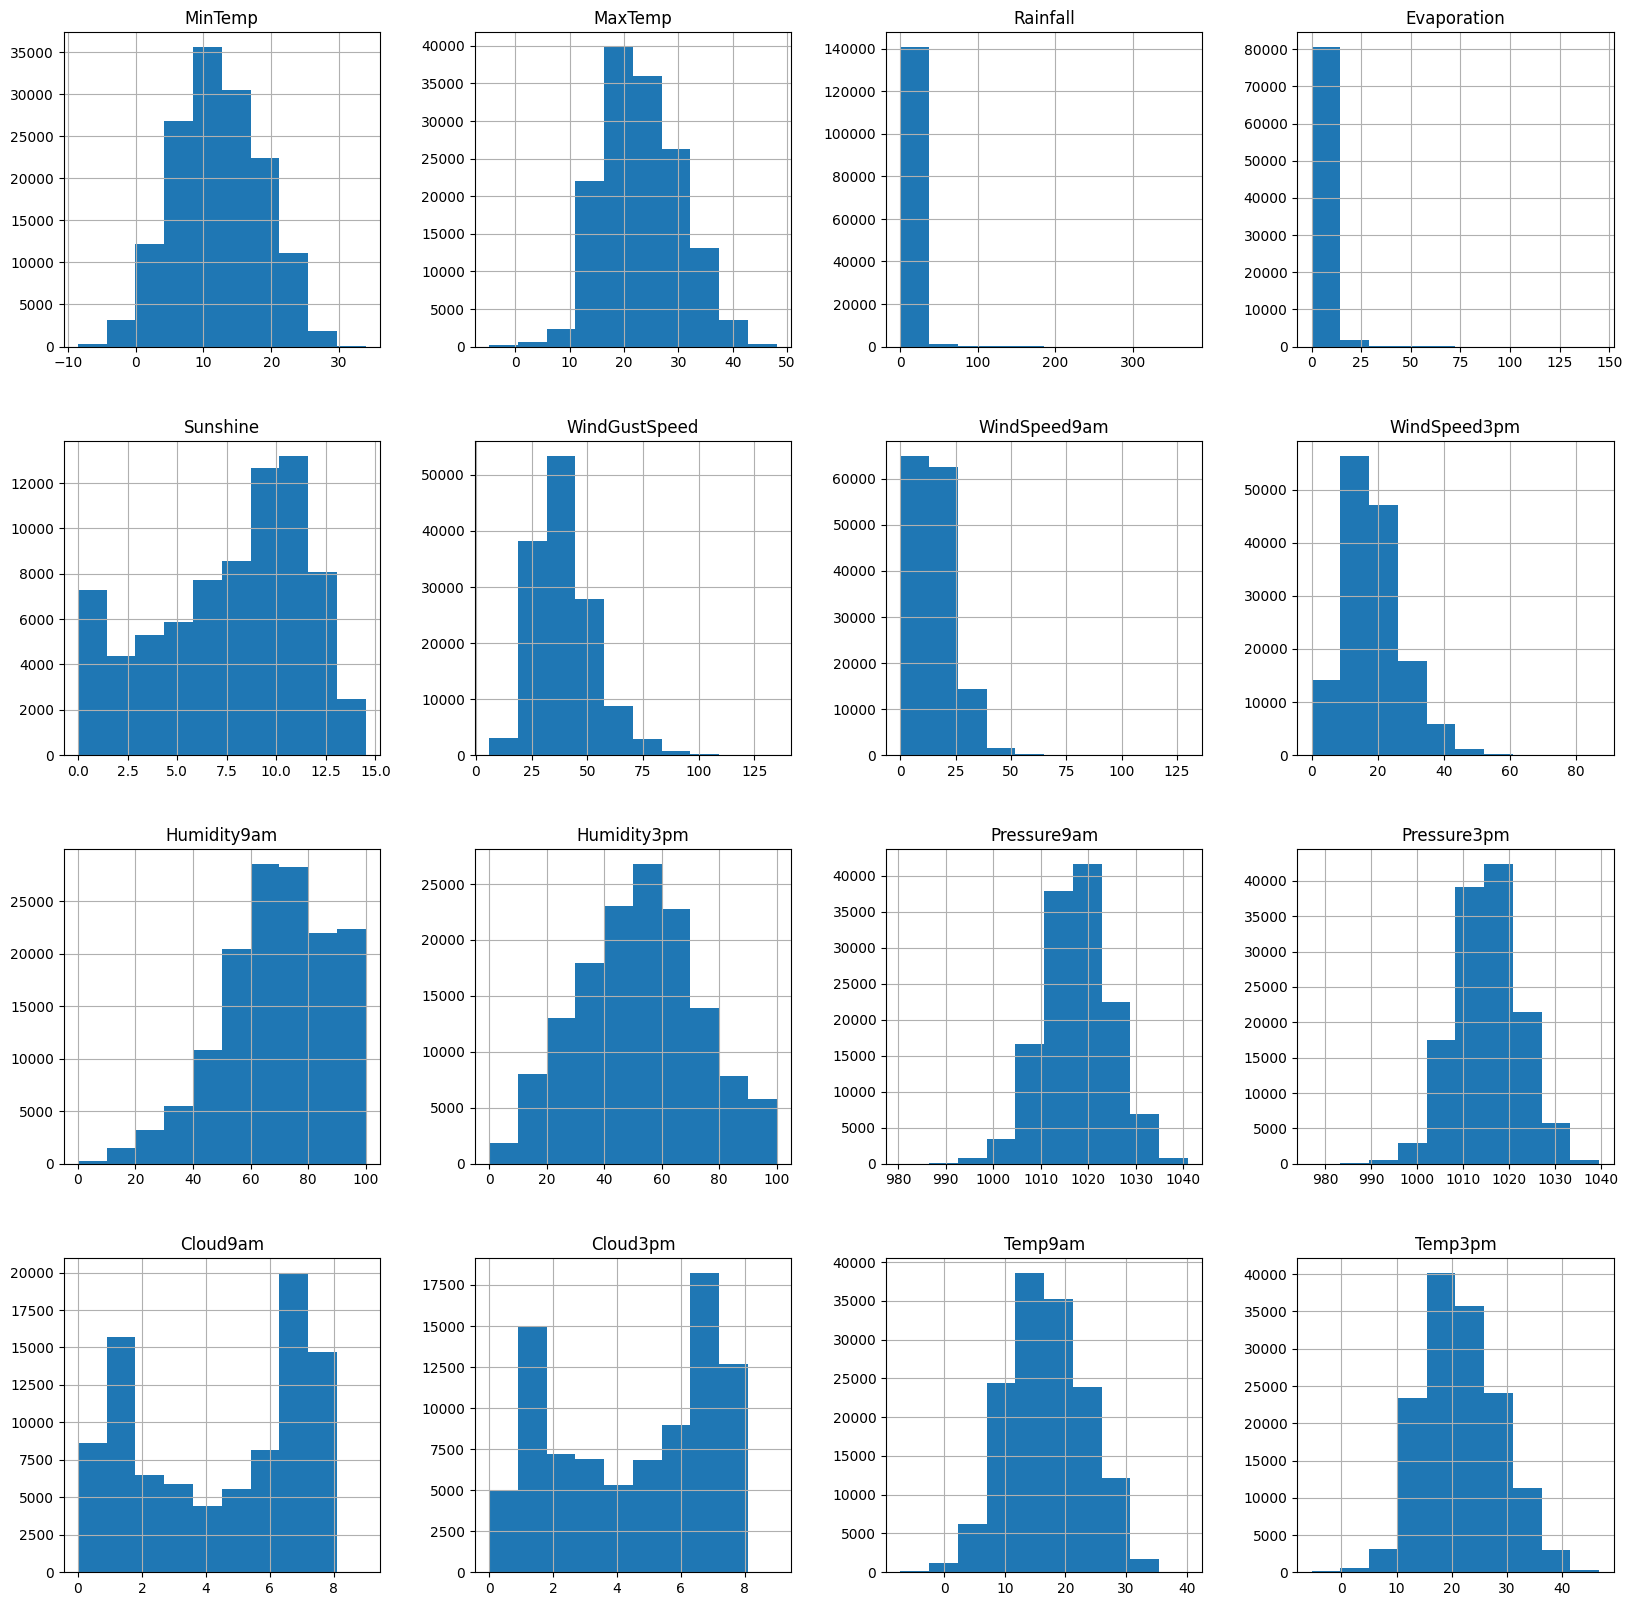

In [11]:
# 2. Visualisasi distribusi setiap fitur (kategorikal dan kontinu)

# Kontinu
df.hist(figsize=(20, 20))
plt.show()

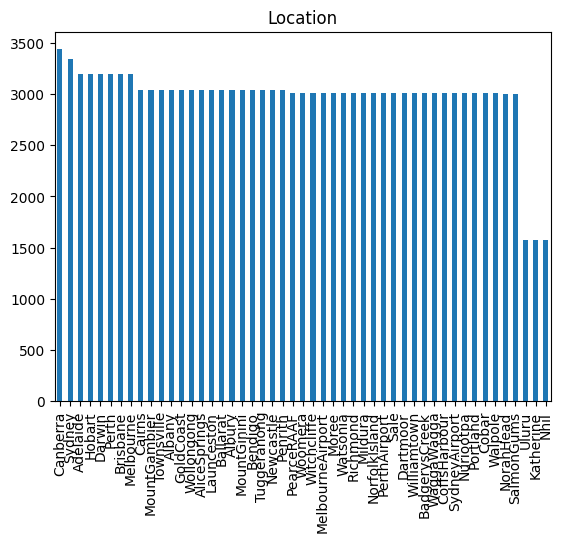

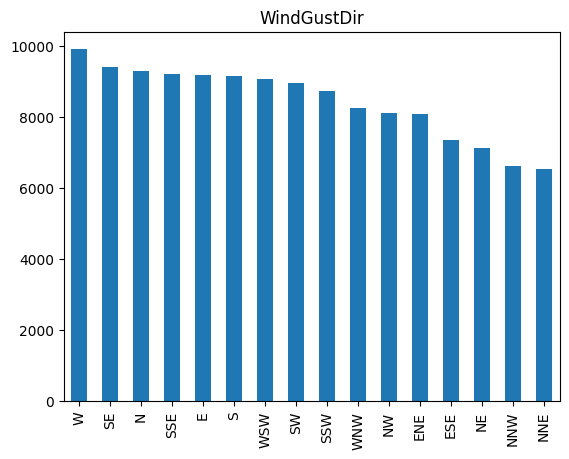

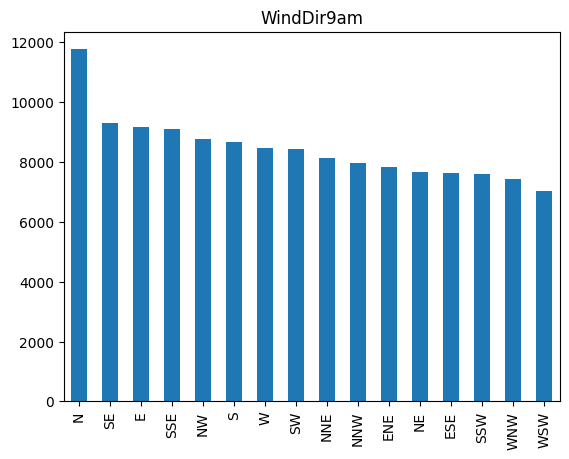

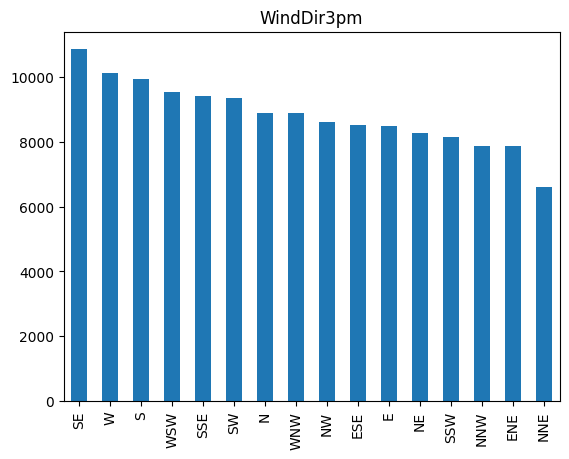

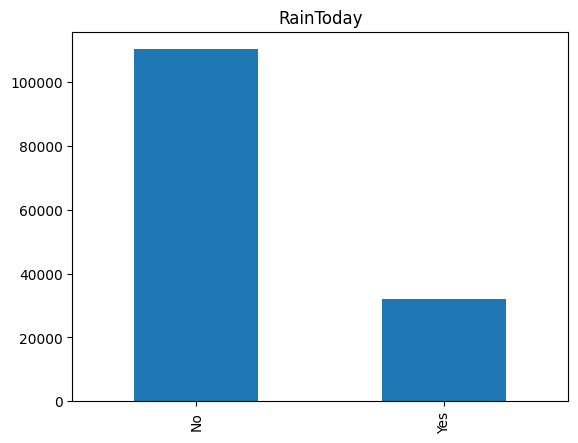

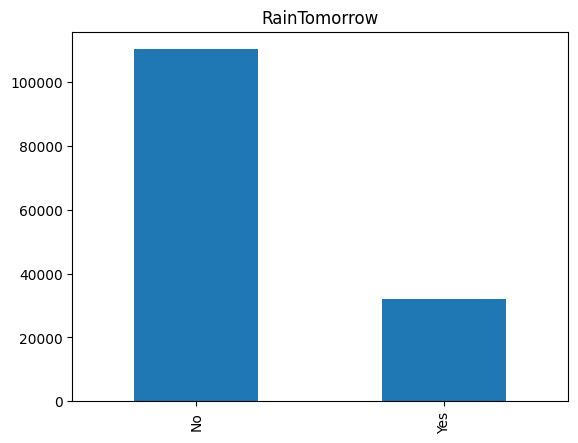

In [12]:
# Kategorikal
for col in df.select_dtypes(include=['object']):
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

## I.4
Lakukanlah analisis lebih lanjut jika diperlukan, kemudian lakukan hal berikut:
1. Penambahan fitur jika memungkinkan
2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
3. Penanganan nilai hilang
4. Transformasi data kategorikal menjadi numerikal (_encoding_)
5. _Scaling_ dengan `MinMaxScaler`

In [13]:
# I.4 Put your code here

# 1. Penambahan fitur jika memungkinkan
# Tidak perlu adanya penambahan fitur

In [14]:
# 2. Pembuangan fitur yang menurut kalian tidak dibutuhkan
# Hujan biasanya tidak dipengaruhi lokasi karena tanda tanda hujan di semua tempat seharusnya sama
df = df.drop(['Location'], axis=1)

# Drop data dengan null yang banyak
for col in df:
    if df[col].isnull().sum() > 50000:
        df = df.drop([col], axis=1)

print(df.shape)
df

(145460, 17)


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [15]:
# 3. Penanganan nilai hilang
# Yang kategorikal pake modus
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Yang numerikal pake mean
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].fillna(df[col].mean())

df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.100000,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.700000,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.000000,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.300000,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,3.6,25.300000,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,5.4,26.900000,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,7.8,27.000000,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [16]:
# 4. Transformasi data kategorikal menjadi numerikal (encoding)

encoder = LabelEncoder()
obj = df.select_dtypes(include=['object']).columns

for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col])

df

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,13,44.00000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.100000,0.0,14,44.00000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.700000,0.0,15,46.00000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.000000,0.0,4,24.00000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.300000,1.0,13,41.00000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,0,31.00000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,3.6,25.300000,0.0,6,22.00000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,5.4,26.900000,0.0,3,37.00000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0
145458,7.8,27.000000,0.0,9,28.00000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0


In [17]:
# 5. Scaling dengan MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.516509,0.523629,0.001617,0.866667,0.294574,0.866667,0.933333,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.508439,0.522073,0.0,0.0
1,0.375000,0.565217,0.000000,0.933333,0.294574,0.400000,1.000000,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.514768,0.570058,0.0,0.0
2,0.504717,0.576560,0.000000,1.000000,0.310078,0.866667,1.000000,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.594937,0.548944,0.0,0.0
3,0.417453,0.620038,0.000000,0.266667,0.139535,0.600000,0.000000,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.533755,0.612284,0.0,0.0
4,0.613208,0.701323,0.002695,0.866667,0.271318,0.066667,0.466667,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.527426,0.673704,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.266509,0.533081,0.000000,0.000000,0.193798,0.600000,0.066667,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.364979,0.533589,0.0,0.0
145456,0.285377,0.568998,0.000000,0.400000,0.124031,0.600000,0.200000,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.381857,0.573896,0.0,0.0
145457,0.327830,0.599244,0.000000,0.200000,0.240310,0.600000,0.933333,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.415612,0.604607,0.0,0.0
145458,0.384434,0.601134,0.000000,0.600000,0.170543,0.666667,0.200000,0.100000,0.080460,0.51,0.24,0.642975,0.6304,0.470464,0.602687,0.0,0.0


# II. Desain Eksperimen
Tujuan dari bagian ini adalah peserta dapat memahami cara melakukan eksperimen mencari metode terbaik dengan benar. Hal yang diliputi adalah sebagai berikut:
1. Pembuatan model
2. Proses validasi
3. _Hyperparameter tuning_

## II.1
Tentukanlah metrik yang akan digunakan pada eksperimen kali ini. Metrik yang dapat lebih dari satu jenis.

(Tuliskan jawaban bagian II.1 di sini.)

> Matriks yang akan digunakan adalah nilai akurasi, precision, recall, dan juga nilai F1

## II.2 
Bagi data dengan perbandingan 0,8 untuk data latih dan 0,2 untuk data validasi.

In [18]:
# II.2 Kode di sini

X = df_scaled.drop(['RainTomorrow'], axis=1)
y = df_scaled['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train, y_train)
print(X_test, y_test)

         MinTemp   MaxTemp  Rainfall  WindGustDir  WindGustSpeed  WindDir9am  \
96775   0.400943  0.527410  0.000000     0.400000       0.286822    0.333333   
96840   0.622642  0.508507  0.000000     0.733333       0.310078    0.733333   
66795   0.462264  0.421550  0.001078     0.933333       0.356589    0.466667   
104598  0.285377  0.508507  0.000000     0.533333       0.271318    0.600000   
137064  0.372642  0.536862  0.000000     0.666667       0.271318    0.600000   
...          ...       ...       ...          ...            ...         ...   
9372    0.540094  0.559546  0.000000     0.866667       0.263839    0.466667   
105595  0.830189  0.916824  0.000000     0.600000       0.294574    0.600000   
93553   0.617925  0.631380  0.000000     0.066667       0.193798    0.733333   
94735   0.804245  0.737240  0.030728     1.000000       0.310078    0.866667   
83209   0.233491  0.393195  0.000539     0.600000       0.255814    0.200000   

        WindDir3pm  WindSpeed9am  WindS

## II.3
Lakukan hal berikut:
1. Prediksi dengan menggunakan model _logistic regression_ sebagai _baseline_.
2. Tampilkan evaluasi dari model yang dibangun dari metrik yang ditentukan pada II.1
3. Tampilkan _confusion matrix_.

In [19]:
# II.3 Kode di sini

model = LogisticRegression(max_iter=10000).fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.8415028186443009
Precision:  0.7131669114047968
Recall:  0.45868093813946165
F1:  0.5582910240444486
[[21567  1172]
 [ 3439  2914]]


## II.4 
Lakukanlah:
1. Pembelajaran dengan model lain
2. _Hyperparameter tuning_ untuk model yang dipakai dengan menggunakan _grid search_ (perhatikan _random factor_ pada beberapa algoritma model)
3. Validasi dengan _cross validation_


In [31]:
# II.4 Kode di sini.

# Menggunakan decision tree
decisionTree = DecisionTreeClassifier()

param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best"],
    "max_depth": [2,4,6,8,10],
    "min_samples_leaf": [2, 4, 8]
}

grid_search = GridSearchCV(decisionTree, param, cv=5, scoring='accuracy').fit(X_train, y_train)
best_params = grid_search.best_params_
best_models = grid_search.best_estimator_

best_models.fit(X_train, y_train)
y_pred = best_models.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy:  0.8415715660662725
Precision:  0.7110358180058083
Recall:  0.46245868093813947
F1:  0.5604196471149261
[[21545  1194]
 [ 3415  2938]]


In [33]:
scores = cross_validate(best_models, X_test, y_test, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', scores['test_accuracy'].mean())
print('Precision: ', scores['test_precision'].mean())
print('Recall: ', scores['test_recall'].mean())
print('F1: ', scores['test_f1'].mean())

Accuracy:  0.8352122475944576
Precision:  0.6836683985084694
Recall:  0.4564755880731274
F1:  0.5471962790452917


# III. Improvement
Pada bagian ini, kalian diharapkan dapat:
1. melakukan pelatihan dengan data hasil _oversampling_ / _undersampling_, disertai dengan validasi yang benar; serta
2. menerapkan beberapa metode untuk menggabungkan beberapa model.

Kedua hal ini adalah contoh metode untuk meningkatkan kinerja dari model.

## III.1
Lakukanlah:
1. _Oversampling_ pada kelas minoritas pada data latih
2. _Undersampling_ pada kelas mayoritas pada data latih

Pada setiap tahap, latih dengan model *baseline* (II.3), dan validasi dengan data validasi. Data latih dan validasi adalah data yang disusun pada bagian II.2.

In [27]:
# III.1 Kode di sini.

# Oversampling
smote = SMOTE(random_state=12)
OX_train, Oy_train = smote.fit_resample(X_train, y_train)
print(OX_train.shape)

model = LogisticRegression(max_iter=10000).fit(OX_train, Oy_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

(181688, 16)
Accuracy:  0.7785645538292314
Precision:  0.4953871669949207
Recall:  0.752243034786715
F1:  0.597375
[[17871  4868]
 [ 1574  4779]]


In [28]:
# Validasi
scores = cross_validate(model, X_test, y_test, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', scores['test_accuracy'].mean())
print('Precision: ', scores['test_precision'].mean())
print('Recall: ', scores['test_recall'].mean())
print('F1: ', scores['test_f1'].mean())

Accuracy:  0.8408156422184978
Precision:  0.7147639405148151
Recall:  0.4509702199892205
F1:  0.5529381370573242


In [29]:
# Undersampling
rus = RandomUnderSampler(random_state=12)
UX_train, Uy_train = rus.fit_resample(X_train, y_train)
print(UX_train.shape)

model = LogisticRegression(max_iter=10000).fit(UX_train, Uy_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

(51048, 16)
Accuracy:  0.7796301388697924
Precision:  0.49698168193172354
Recall:  0.7516134109869353
F1:  0.5983334377545266
[[17906  4833]
 [ 1578  4775]]


In [30]:
scores = cross_validate(model, X_test, y_test, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', scores['test_accuracy'].mean())
print('Precision: ', scores['test_precision'].mean())
print('Recall: ', scores['test_recall'].mean())
print('F1: ', scores['test_f1'].mean())

Accuracy:  0.8408156422184978
Precision:  0.7147639405148151
Recall:  0.4509702199892205
F1:  0.5529381370573242


## III.2
Lakukanlah:
1. Eksplorasi _soft voting_, _hard voting_, dan _stacking_.
2. Buatlah model _logistic regression_ dan SVM.
3. Lakukanlah _soft voting_ dari model-model yang dibangun pada poin 2.
4. Lakukan _hard voting_ dari model-model yang dibangun pada poin 2.
5. Lakukanlah _stacking_ dengan _final classifier_ adalah _logistic regression_ dari model-model yang dibangun pada poin 2.
6. Lakukan validasi dengan metrics yang telah ditentukan untuk poin 3, 4, dan 5.

(Tuliskan hasil eksplorasi III.2 poin 1 di sini.)

In [21]:
# III.2 Kode di sini.
lr = LogisticRegression(max_iter=1000)
svm = SVC(probability=True, max_iter=100)

In [23]:
# Soft Voting
model = VotingClassifier(estimators=[('lr', lr), ('svm', svm)], voting='soft')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

scores = cross_validate(model, X_test, y_test, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', scores['test_accuracy'].mean())
print('Precision: ', scores['test_precision'].mean())
print('Recall: ', scores['test_recall'].mean())
print('F1: ', scores['test_f1'].mean())

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
Accuracy:  0.8297126357761584
Precision:  0.7995717344753748
Recall:  0.2938769085471431
F1:  0.42978821362799263
[[22271   468]
 [ 4486  1867]]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing you

In [22]:
# Hard Voting
model = VotingClassifier(estimators=[('lr', lr), ('svm', svm)], voting='hard')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

scores = cross_validate(model, X_test, y_test, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', scores['test_accuracy'].mean())
print('Precision: ', scores['test_precision'].mean())
print('Recall: ', scores['test_recall'].mean())
print('F1: ', scores['test_f1'].mean())

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
Accuracy:  0.7916265640038499
Precision:  0.6644067796610169
Recall:  0.09255469856760586
F1:  0.16247582205029013
[[22442   297]
 [ 5765   588]]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing yo

In [24]:
model = StackingClassifier(estimators=[('lr', lr), ('svm', svm)], final_estimator=LogisticRegression(max_iter=10000))
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

scores = cross_validate(model, X_test, y_test, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))

print('Accuracy: ', scores['test_accuracy'].mean())
print('Precision: ', scores['test_precision'].mean())
print('Recall: ', scores['test_recall'].mean())
print('F1: ', scores['test_f1'].mean())

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/svm/_base.py:301: Conv

# IV. Analisis
Bandingkan hasil dari hal-hal berikut:
1. Model _baseline_ (II.3)
2. Model lain (II.4)
3. Hasil _undersampling_
4. Hasil _oversampling_
5. Hasil _soft voting_
6. Hasil _hard voting_
7. Hasil _stacking_

(Tuliskan jawaban bagian IV di sini.)

## IV.1

Model Baseline digunakan sebagai perbandingan untuk model model yang lain. Model ini menggunakan logistic regression sebagai baseline. Model Baseline memiliki metrik berikut

```
Accuracy:  0.8415028186443009
Precision:  0.7131669114047968
Recall:  0.45868093813946165
F1:  0.5582910240444486
```
Dan berikut adalah confusion matrixnya
```
[[21567  1172]
 [ 3439  2914]]
```

### IV.2
Model lain (Decision Tree Classifier) memiliki metrik berikut. Dapat dilihat bahwa model dengan menggunakan DTC lebih baik karena nilai Accuracy dan F1 nya meningkat jauh lebih banyak dibandingkan dengan model baseline
```
Accuracy:  0.8415715660662725
Precision:  0.7110358180058083
Recall:  0.46245868093813947
F1:  0.5604196471149261
```

Dan ketika di cross validate, hasil Accuracy dan F1 menurun sehingga hal ini terjadi karena terdapat overfitting pada modelnya yang terlalu fit dengan data training yang diberikan
```
Accuracy:  0.8352122475944576
Precision:  0.6836683985084694
Recall:  0.4564755880731274
F1:  0.5471962790452917
```
### IV.3
Hasil undersampling memiliki metrik berikut. undersampling menunjukan akurasi yang lebih kecil dibandingkan dengan baseline. namun memiliki recall yang lebih tinggi
```
Accuracy:  0.7796301388697924
Precision:  0.49698168193172354
Recall:  0.7516134109869353
F1:  0.5983334377545266
```
Dan ketika di cross validate, hasilnya meningkatkan akurasi dan precision namun menurunkan recall dan F1. Karena recall turun otomatis F1 juga turun. Recall dapat turun karena banyak sampling yang bersifat true positif banyak dibuang
```
Accuracy:  0.8408156422184978
Precision:  0.7147639405148151
Recall:  0.4509702199892205
F1:  0.5529381370573242
```
### IV.4

Hasil oversampling memiliki metrik berikut. Dapat dilihat oversampling memilki nilai akursai dan precision memiliki nilai yang lebih jelek dibandingkan yang lain namun sisanya meningkat
```
Accuracy:  0.7785645538292314
Precision:  0.4953871669949207
Recall:  0.752243034786715
F1:  0.597375
```

Dan ketika di cross validate, hasilnya adalah terjadi peningkatan di segala aspek kecuali recall dan F1
```
Accuracy:  0.8408156422184978
Precision:  0.7147639405148151
Recall:  0.4509702199892205
F1:  0.5529381370573242
```
### IV.5
Hasil soft voting memiliki metrik berikut. metrik memiliki nilai yang lebih rendah di segala aspek kecuali akurasi dan 
```
Accuracy:  0.8297126357761584
Precision:  0.7995717344753748
Recall:  0.2938769085471431
F1:  0.42978821362799263
```
Dan ketika di cross validate, hasilnya adalah
```
Accuracy:  0.8104982368600719
Precision:  0.8110993661373588
Recall:  0.1692194750243159
F1:  0.26908772007071013
```

### IV.6
Hasil hard voting memiliki metrik berikut. Nilai recall dan F1 sangat kecil karena belum sampai convergence
```
Accuracy:  0.7916265640038499
Precision:  0.6644067796610169
Recall:  0.09255469856760586
F1:  0.16247582205029013
```

Dan ketika di cross validate, hasilnya menurun dibandingkan modelnya karena terjadi overfitting pada model
```
Accuracy:  0.7887394342604397
Precision:  0.6709149184323178
Recall:  0.06217449215386235
F1:  0.11248526303084021
```

### IV.7
Hasil stacking memiliki metrik berikut
```
Accuracy:  0.8413309500893716
Precision:  0.7112624665531501
Recall:  0.46025499763891076
F1:  0.5588685015290519
```

Dan ketika di cross validate, hasilnya adalah tidak banyak jauh berubah dibandingkan yang lain sehingga model ini sudah tepat
```
Accuracy:  0.840712502180627
Precision:  0.7102763653138782
Recall:  0.45695112658517995
F1:  0.5560731342657197
```

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6316c9e-5d75-4550-8ea1-64393339b139' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>